# Electronica DS
#### Reporte de calidad de los datos jun/2022

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
ventas = pd.read_csv('Venta.csv')
compras = pd.read_csv('Compra.csv')
gastos = pd.read_csv('Gasto.csv')
clientes = pd.read_csv('Clientes.csv', sep=';', usecols = ['ID','Provincia','Nombre_y_Apellido','Domicilio','Telefono','Edad','Localidad','X','Y', 'col10'])
proveedores = pd.read_csv('Proveedores.csv',delimiter = ',',encoding = "ansi")
sucursales = pd.read_csv('Sucursales.csv', sep=';')
localidades = pd.read_csv('Localidades.csv')

In [43]:
def cal_datos(data, campo):
    Q1 = data[campo].quantile(0.25)
    Q3 = data[campo].quantile(0.75)
    #Se calcula el rango intercuartilico IQR.
    IQR = Q3 -Q1
    outliersSup = (Q3 + (1.5 * IQR)) 
    mask = data[campo]<outliersSup
    ventaSinOut2 = data[mask]
    sinErrores = ventaSinOut2.shape[0]
    ventaNulos=data[campo].isnull().sum()
    outliers = data.shape[0]-ventaNulos-sinErrores
    #porcentajes para graficar
    porc_ok = round((sinErrores * 100)/data.shape[0], 2)
    porc_nu = round((ventaNulos * 100)/data.shape[0], 2)
    porc_out = round((outliers * 100)/data.shape[0], 2)
    #Se cargan los datos para graficar
    datos = ['Valores Nulos','Sin Errores' ,'Outliers'] 
    porcentaje = [porc_nu,porc_ok,porc_out] 
    df = pd.DataFrame({"Datos": datos, 
                    "Porcentaje": porcentaje}) 
    #Se grafica.
    plot = sns.barplot(x='Datos', y="Porcentaje", data=df, palette = "Blues_r")
    for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
    plot.set_title(f"Calidad De Los Datos de {campo}", fontsize = 16)
    plt.show()
    # print("Porcentaje ok: ", porc_ok, 2, "Porcentaje nulos: ", porc_nu, "Porcentaje outliers ", porc_out)
    

In [44]:
def integridad(df):
    for column in df.columns:
    # if round(df[str(column)].notna().sum()/len(df)*100, 2) < 100:
        print(f'La integridad de la colúmna {column}, en cuanto a valores faltantes es del {round(df[str(column)].notna().sum()/len(df)*100, 2)}%')

In [45]:
def prep(df):
    registros, columnas = df.shape
    print(f'La tabla está formada por {registros} registros, y {columnas} columnas')

In [46]:
def get_missings(df,plot=True,rotation=45,figsize=(10,5), * kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0]) * 100)
        #Make a dataframe 
        missings=pd.DataFrame({'Colúmnas':labels,'Valores faltantes':values,'PorcentajePerdido':percent}).sort_values(by='PorcentajePerdido',ascending=False)
        

        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Colúmnas,y=round(missings.PorcentajePerdido, 2), palette = "Blues_r")# .set_title('Porcentaje de valores perdidos',size=22)
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Colúmnas',size=18)
            plt.ylabel('Porcentaje',size=18)
            plot.set_title('Porcentaje de valores perdidos',size=18)

        return missings
    else:
        return False

# **Tabla:** Ventas
### Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdVenta | IdVenta | int64 | Clave única que identifica la venta |
| 1 | Fecha | Fecha | datetime64 | Fecha de la venta realizada |
| 2 | Fecha_Entrega | Fecha_Entrega | datetime64 | Fecha de entrega de la venta realizada |
| 3 | IdCanal | IdCanal | int64 | Clave única que identifica el canal de venta |
| 4 | IdCliente | IdCliente | int64 | Clave única que identifica al cliente |
| 5 | IdSucursal | IdSucursal | int64 | Clave única que identifica a la sucursal |
| 6 | IdEmpleado | IdEmpleado | int64 | Clave única que identifica al empleado |
| 7 | IdProducto | IdProducto | int64 | Clave única que identifica el producto de la venta|
| 8 | Precio | Precio | float64 | Precio total de la venta realizada |
| 9 | Cantidad | Cantidad | float64 | Cantidad de producto de la venta realizada |


# Bitácora
##### Durante la exploración de la tabla ventas se encontró:


In [47]:
prep(ventas)

La tabla está formada por 46180 registros, y 10 columnas


In [48]:
ventas.head(1)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0


In [49]:
integridad(ventas)

La integridad de la colúmna IdVenta, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha_Entrega, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdCanal, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdCliente, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdSucursal, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdEmpleado, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdProducto, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Precio, en cuanto a valores faltantes es del 98.01%
La integridad de la colúmna Cantidad, en cuanto a valores faltantes es del 98.09%


,Colúmnas,Valores faltantes,PorcentajePerdido
0,Precio,920,1.992204
1,Cantidad,884,1.914249


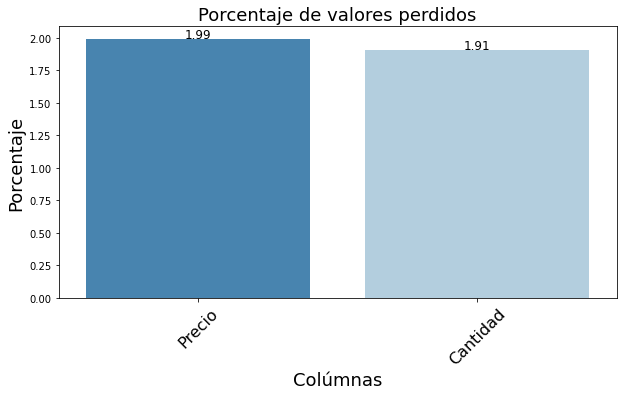

In [50]:
get_missings(ventas)

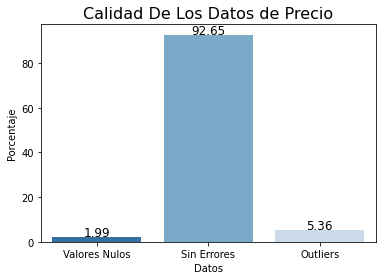

In [51]:
cal_datos(ventas, 'Precio')

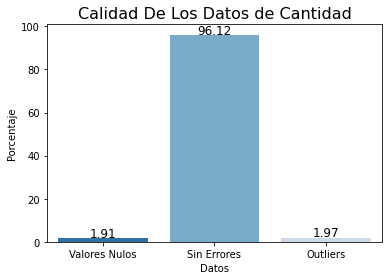

In [52]:
cal_datos(ventas, "Cantidad")

# **Tabla:** Cliente
### Diccionario
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCliente | ID | int64 | Clave única que identifica al cliente |
| 1 | Nombre_y_Apellido | Nombre_y_Apellido | object | Nombre y apellido del cliente |
| 2 | Edad | Edad | int64 | Edad del cliente |
| 3 | Telefono | Telefono | object | Teléfono del cliente |
| 4 | Domicilio | Domicilio | object | Domicilio del cliente |
| 5 | Provincia | Provincia | object | Provincia del cliente |
| 6 | Localidad | Localidad | object | Localidad del cliente |
| 7 | Latitud | X | float64 | Latitud del domicilio del cliente |
| 8 | Longitud | Y | float64 | Longitud del domicilio del cliente |

In [53]:
prep(clientes)

La tabla está formada por 2384 registros, y 10 columnas


In [54]:
clientes.head(1)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN


In [55]:
integridad(clientes)

La integridad de la colúmna ID, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Provincia, en cuanto a valores faltantes es del 98.95%
La integridad de la colúmna Nombre_y_Apellido, en cuanto a valores faltantes es del 99.2%
La integridad de la colúmna Domicilio, en cuanto a valores faltantes es del 98.2%
La integridad de la colúmna Telefono, en cuanto a valores faltantes es del 98.7%
La integridad de la colúmna Edad, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Localidad, en cuanto a valores faltantes es del 98.95%
La integridad de la colúmna X, en cuanto a valores faltantes es del 97.73%
La integridad de la colúmna Y, en cuanto a valores faltantes es del 97.82%
La integridad de la colúmna col10, en cuanto a valores faltantes es del 0.0%


,Colúmnas,Valores faltantes,PorcentajePerdido
5,X,54,2.265101
6,Y,52,2.181208
2,Domicilio,43,1.803691
3,Telefono,31,1.300336
0,Provincia,25,1.048658
4,Localidad,25,1.048658
1,Nombre_y_Apellido,19,0.796980


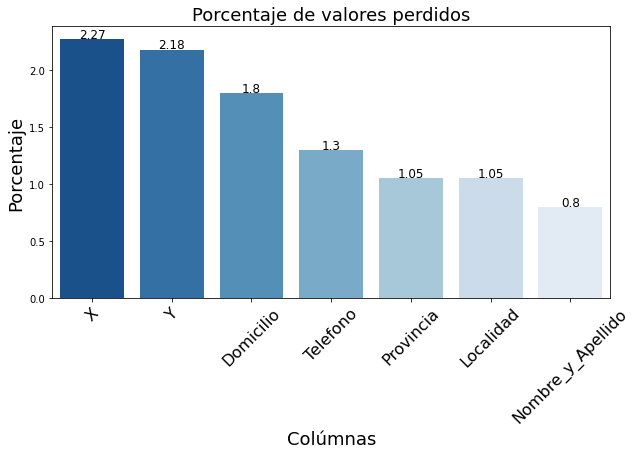

In [56]:
get_missings(clientes.drop(columns = 'col10'))

## **Tabla:** Compra
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCompra | IdCompra | int64 | Clave única que identifica una compra |
| 1 | Fecha | Fecha | datetime64 | Fecha registrada de compra |
| 2 | Fecha_Año | Fecha_Año | int64 | Año registrado de compra |
| 3 | Fecha_Mes | Fecha_Mes | int64 | Mes registrado de compra |
| 4 | Fecha_Periodo | Fecha_Periodo | int64 | Periodo registrado de compra  |
| 5 | IdProducto | IdProducto | int64 | Clave única que identifica al producto adquirido |
| 6 | Cantidad | Cantidad | int64 | Cantidad de producto adquirido en la compra |
| 7 | Precio | Precio | float64 | Precio pagado por la compra |
| 8 | IdProveedor | IdProveedor | int64 | Clave única que identifica al proveedor |

In [57]:
prep(compras)

La tabla está formada por 11539 registros, y 9 columnas


In [58]:
compras.head(1)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12


In [59]:
integridad(compras)

La integridad de la colúmna IdCompra, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha_Año, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha_Mes, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha_Periodo, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdProducto, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Cantidad, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Precio, en cuanto a valores faltantes es del 96.82%
La integridad de la colúmna IdProveedor, en cuanto a valores faltantes es del 100.0%


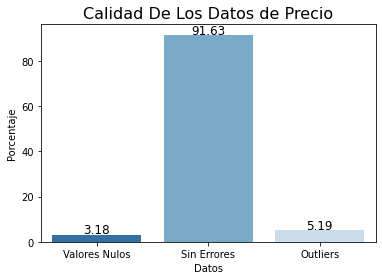

In [60]:
cal_datos(compras, 'Precio')

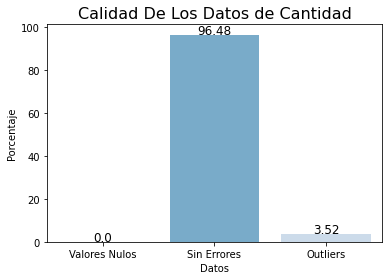

In [61]:
cal_datos(compras, 'Cantidad')

## **Tabla:** Gasto
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdGasto | IdGasto | int64 | Clave única que identifica el gasto |
| 1 | IdSucursal | IdSucursal | int64 | Clave única que identifica la sucursal |
| 2 | IdTipoGasto | IdTipoGasto | int64 | Clave única que identifica el tipo de gasto |
| 3 | Fecha | Fecha | datetime64 | Fecha registrada del gasto |
| 4 | Monto | Monto | float64 | Monto total del gasto |

In [62]:
prep(gastos)

La tabla está formada por 8640 registros, y 5 columnas


In [63]:
gastos.head(1)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.9


In [64]:
integridad(gastos)

La integridad de la colúmna IdGasto, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdSucursal, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna IdTipoGasto, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Fecha, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Monto, en cuanto a valores faltantes es del 100.0%


## **Tabla:** Localidad
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdLocalidad | id | int64 | Clave única que identifica la localidad |
| 1 | Localidad | nombre | object | Nombre de la localidad |
| 2 | IdMunicipio | municipio_id | int64 | Clave única que identifica al municipio |
| 3 | Municipio | municipio_nombre | object | Nombre del municipio |
| 4 | IdDepartamento | departamento_id | int64 | Clave única que identifica al departamento |
| 5 | Departamento | departamento_nombre | object | Nombre del departamento |
| 6 | IdProvincia | provincia_id | int64 | Clave única que identifica la provincia |
| 7 | Provincia | provincia_nombre | object | Nombre de la provincia |
| 8 | Fuente | fuente | object | Fuente de información de datos censales |
| 9 | IdLocalidadCensal | localidad_censal_id | int64 | Clave única que identifica la localidad censal  |
| 10 | LocalidadCensal | localidad_censal_nombre | object | Nombre de la localidad censal |
| 11 | Categoria | categoria | object | Categoria de la localidad censal |
| 12 | Latitud | centroide_lat | float64 | Latitud de la localidad |
| 13 | Longitud | centroide_lon | float64 | Longitud de la localidad |

In [65]:
prep(localidades)

La tabla está formada por 4142 registros, y 14 columnas


In [66]:
localidades.head(1)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.28062,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires


In [67]:
integridad(localidades)

La integridad de la colúmna categoria, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna centroide_lat, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna centroide_lon, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna departamento_id, en cuanto a valores faltantes es del 99.98%
La integridad de la colúmna departamento_nombre, en cuanto a valores faltantes es del 99.98%
La integridad de la colúmna fuente, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna id, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna localidad_censal_id, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna localidad_censal_nombre, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna municipio_id, en cuanto a valores faltantes es del 86.89%
La integridad de la colúmna municipio_nombre, en cuanto a valores faltantes es del 88.07%
La integridad de la colúmna nombre, en 

,Colúmnas,Valores faltantes,PorcentajePerdido
2,municipio_id,543,13.109609
3,municipio_nombre,494,11.926606
0,departamento_id,1,0.024143
1,departamento_nombre,1,0.024143


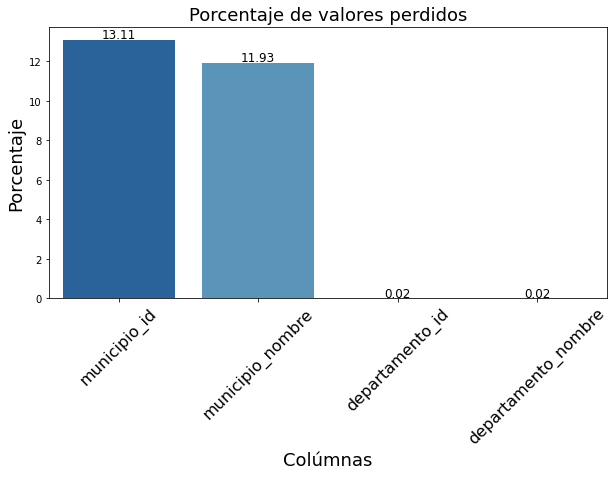

In [68]:
get_missings(localidades)

## **Tabla:** Proveedor
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdProveedor | IDProveedor | int64 | Clave única que identifica al proveedor |
| 1 | Proveedor | Nombre | object | Nombre del proveedor |
| 2 | Domicilio | Address | object | Domicilio del proveedor |
| 3 | Ciudad | City | object | Ciudad del proveedor |
| 4 | Provincia | State | object | Provincia del proveedor |
| 5 | Pais | Country | object | Pais del proveedor |
| 6 | Departamento | departamen | object | Departamento del proveedor |

In [69]:
prep(proveedores)

La tabla está formada por 14 registros, y 7 columnas


In [70]:
proveedores.head(1)

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA


In [71]:
integridad(proveedores)

La integridad de la colúmna IDProveedor, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Nombre, en cuanto a valores faltantes es del 85.71%
La integridad de la colúmna Address, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna City, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna State, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Country, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna departamen, en cuanto a valores faltantes es del 100.0%


,Colúmnas,Valores faltantes,PorcentajePerdido
0,Nombre,2,14.285714


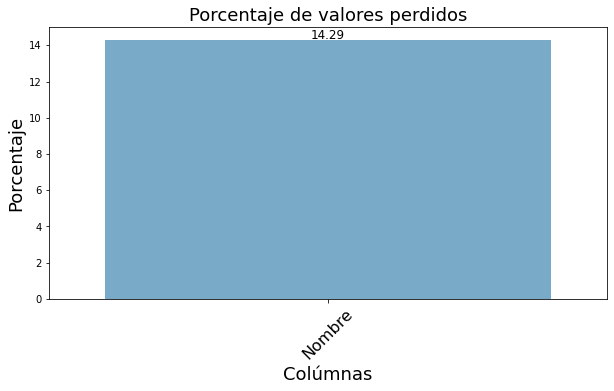

In [72]:
get_missings(proveedores)

## **Tabla:** Sucursal
| | Columna Normalizada | Columna Original | Tipo de Dato | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdSucursal | ï»¿ID | int64 | Clave única que identifica la sucursal |
| 1 | Sucursal | Sucursal | object | Nombre de la sucursal |
| 2 | Domicilio | Direccion | object | Domicilio de la sucursal |
| 3 | Localidad | Localidad | object | Localidad de la sucursal |
| 4 | Provincia | Provincia | object | Provincia de la sucursal |
| 5 | Latitud | Latitud | float64 | Latitud de la sucursal |
| 6 | Longitud | Longitud | float64 | Longitud de la sucursal |

In [73]:
prep(sucursales)

La tabla está formada por 31 registros, y 7 columnas


In [74]:
sucursales.head(1)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"


In [75]:
integridad(sucursales)

La integridad de la colúmna ID, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Sucursal, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Direccion, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Localidad, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Provincia, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Latitud, en cuanto a valores faltantes es del 100.0%
La integridad de la colúmna Longitud, en cuanto a valores faltantes es del 100.0%


In [76]:
get_missings(sucursales)

False